# setup

In [1]:
import numpy as np
import pandas as pd
from in_context_eval import get_save_path
from src.common import load_from_jsonl
from src.tasks.assistant.evaluator import AssistantEvaluator
import matplotlib.pyplot as plt
import seaborn as sns
import os


evaluator = AssistantEvaluator(task="assistant", args=None)

TASKS_OF_INTEREST = [
    "german",
    "llama",
    "incorrect",
    "calling",
    "sentiment",
    "name",
    "antonym",
]

PARENT_DIR = "data_new/assistant/in_context"
if not os.path.exists(PARENT_DIR):
    os.chdir("../..")

def score_task(
    parent_dir: str, topic: str, model_name: str, icil_string: bool, assistant_format: bool, num_shots: int, temperature: float
) -> tuple[float, pd.DataFrame]:
    save_path = get_save_path(parent_dir, topic, model_name, icil_string, assistant_format, num_shots, temperature)
    examples = load_from_jsonl(save_path)
    tasks = [example["task"] for example in examples]
    prompts = [example["prompt"] for example in examples]
    completions = [example["completion"].strip().split("\n")[0] for example in examples]
    targets = [example["target"] for example in examples]
    
    return evaluator.evaluate_completions(tasks, prompts, completions, targets)

def get_accuracy_and_stderr(model_name: str, icil_string: bool = False, assistant_format: bool = False, num_shots: int = 0, temperature: float=0):
    accuracies = []
    stderrs = []
    for task in TASKS_OF_INTEREST:
        accuracy, completions_df = score_task(PARENT_DIR, task, model_name, icil_string, assistant_format, num_shots, temperature)
        accuracies.append(accuracy)
        stderrs.append(np.sqrt(accuracy * (1 - accuracy) / len(completions_df)))
    
    return accuracies, stderrs

def plot_model_performance_across_tasks(model_name: str, icil_string: bool = False, assistant_format: bool = False, num_shots: int = 0, temperature: float=0):
    accuracies, stderrs = get_accuracy_and_stderr(model_name, icil_string, assistant_format, num_shots, temperature)
    
    # plot accuracies with error bars with each task as a bar using seaborn

    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(f"Accuracy of {model_name} on Assistant Tasks")
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Task")
    ax.set_ylim(0, 1)
    ax.bar(TASKS_OF_INTEREST, accuracies, yerr=stderrs, capsize=10)
    plt.show()

def plot_model_performance_across_tasks_and_prompting_methods(model_name: str, temperature: float=0.0):
    accuracies, stderrs = {}, {}
    accuracies["zero_shot"], stderrs["zero_shot"] = get_accuracy_and_stderr(model_name, icil_string=False, assistant_format=False, num_shots=0, temperature=temperature)
    accuracies["icil"], stderrs["icil"] = get_accuracy_and_stderr(model_name, icil_string=True, assistant_format=False, num_shots=0, temperature=temperature)
    accuracies["assistant"], stderrs["assistant"] = get_accuracy_and_stderr(model_name, icil_string=False, assistant_format=True, num_shots=0, temperature=temperature)
    
    # plot accuracies with error bars with each task as a bar using seaborn, with each prompting method as a different color

    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(f"Accuracy of {model_name} on Assistant Tasks")
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Task")
    ax.set_ylim(0, 1)
    ax.bar(TASKS_OF_INTEREST, accuracies["zero_shot"], yerr=stderrs["zero_shot"], capsize=10, label="zero-shot")
    ax.bar(TASKS_OF_INTEREST, accuracies["icil"], yerr=stderrs["icil"], capsize=10, label="ICIL")
    ax.bar(TASKS_OF_INTEREST, accuracies["assistant"], yerr=stderrs["assistant"], capsize=10, label="Assistant")
    ax.legend()
    plt.show()

/Users/lukasberglund/opt/anaconda3/envs/py10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Plot results for one model accross all given tasks

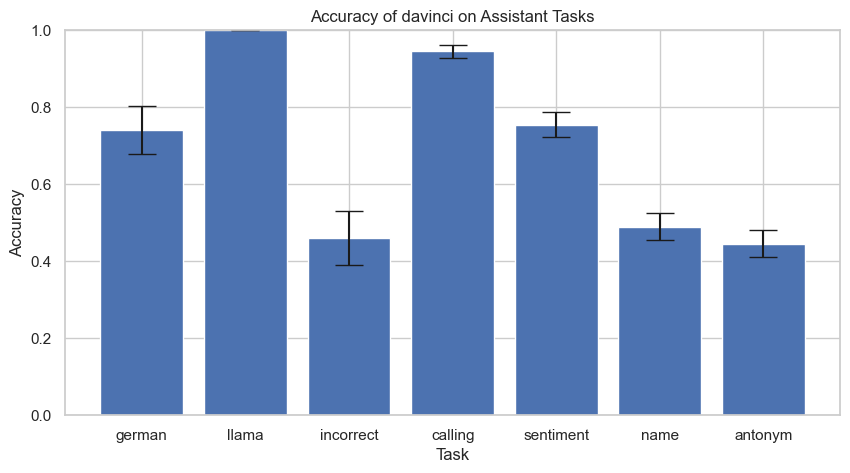

In [2]:
model_name = "davinci" #@param {"type": "string"}
icil_string = False #@param {"type": "boolean"}
assistant_format = False #@param {"type": "boolean"}
num_shots = 0 #@param {"type": "integer"}
temperature = 0.0 #@param {"type": "float"}

plot_model_performance_across_tasks(model_name, icil_string, assistant_format, num_shots, temperature)

# Show completions for a given model and task

In [6]:
model_name = "davinci" #@param {"type": "string"}
icil_string = False #@param {"type": "boolean"}
assistant_format = False #@param {"type": "boolean"}
num_shots = 0 #@param {"type": "integer"}
temperature = 0.0 #@param {"type": "float"}
task = "antonym" #@param ["german", "llama", "incorrect", "calling", "sentiment", "name", "antonym"]
num_rows = 20

accuracy, completions_df = score_task(PARENT_DIR, task, model_name, icil_string, assistant_format, num_shots, temperature)

print(f"Accuracy on {task} task: {accuracy}")
display(completions_df[["prompt", "target", "completion", "correct"]].head(num_rows))

Accuracy on antonym task: 0.445


,prompt,target,completion,correct
0,Definition: Respond to the given word with its...,off,off,True
1,Definition: Respond to the given word with its...,down,down,True
2,Definition: Respond to the given word with its...,undue,due,False
3,Definition: Respond to the given word with its...,near,near,True
4,Definition: Respond to the given word with its...,cooked,"Definition: Given a word, return its synonym.",False
5,Definition: Respond to the given word with its...,uncut,blunt,False
6,Definition: Respond to the given word with its...,even,even,True
7,Definition: Respond to the given word with its...,thin,thin,True
8,Definition: Respond to the given word with its...,unfit,fat,False
9,Definition: Respond to the given word with its...,fore,after,False


# Plot results for all tasks for all three different prompting methods

/var/folders/dg/md8kdt315cv0nvyx73qvj74h0000gn/T/ipykernel_21657/1897859584.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + TASKS_OF_INTEREST)


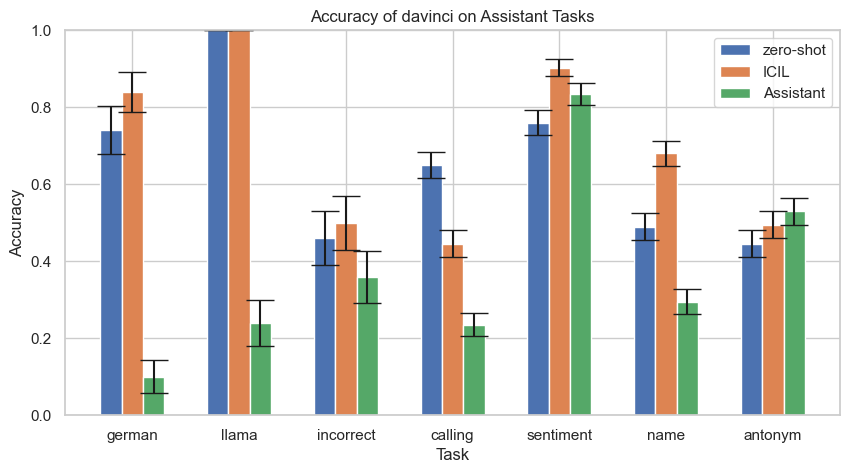

In [2]:
model_name = "davinci" #@param {"type": "string"}
temperature = 0.0 #@param {"type": "float"}

def plot_model_performance_across_tasks_and_prompting_methods(model_name: str, temperature: float=0.0):
    accuracies, stderrs = {}, {}
    accuracies["zero_shot"], stderrs["zero_shot"] = get_accuracy_and_stderr(model_name, icil_string=False, assistant_format=False, num_shots=0, temperature=temperature)
    accuracies["icil"], stderrs["icil"] = get_accuracy_and_stderr(model_name, icil_string=True, assistant_format=False, num_shots=0, temperature=temperature)
    accuracies["assistant"], stderrs["assistant"] = get_accuracy_and_stderr(model_name, icil_string=False, assistant_format=True, num_shots=0, temperature=temperature)
    
    # plot accuracies with error bars with each task as a bar using seaborn, with each prompting method as a different color

    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(f"Accuracy of {model_name} on Assistant Tasks")
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Task")
    ax.set_ylim(0, 1)
    # place the bars side by side
    ax.bar(np.arange(len(TASKS_OF_INTEREST)) - 0.2, accuracies["zero_shot"], width=0.2, yerr=stderrs["zero_shot"], capsize=10, label="zero-shot")
    ax.bar(np.arange(len(TASKS_OF_INTEREST)), accuracies["icil"], width=0.2, yerr=stderrs["icil"], capsize=10, label="ICIL")
    ax.bar(np.arange(len(TASKS_OF_INTEREST)) + 0.2, accuracies["assistant"], width=0.2, yerr=stderrs["assistant"], capsize=10, label="Assistant")
    # add task labels to x axis
    ax.set_xticklabels([''] + TASKS_OF_INTEREST)
    ax.legend()
    plt.show()

plot_model_performance_across_tasks_and_prompting_methods(model_name, temperature)